# Respuestas a Prueba Técnica Data Science AMA-DTD-USM 

In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



**Problema 1: Problema de regresión multivariable** 

En la siguiente URL: https://bit.ly/3ovJ7jC usted dispone de una tabla de 36 observaciones año a año del mercado de la gasolina en Estados Unidos. La documentación de esta tabla es como sigue: 

![img](img.png)

**1.a)** Ajustar el modelo de regresión del consumo de gasolina per capita sobre todas las demás variables explicativas, incluyendo la tendencia temporal, y reportar todos los resultados. ¿Se condicen los signos de las estimaciones con tus expectativas?

**1.b)** Comentar acerca de la significancia estadística de las variables, y reestimar si es necesario. 

**1.c)** Testear las hipótesis de que, al menos en lo que respecta a la demanda de gasolina, los consumidores
no diferencian entre los cambios en los precios de los autos nuevos y usados.


Cargar datos

In [375]:
# Por simplicidad los datos fueron migrados a un archivo .csv
data = pd.read_csv('Precio_combustible.csv', sep=';')

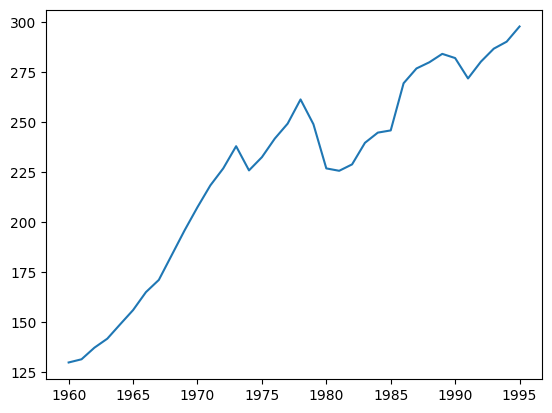

In [130]:
#Fluctiación de índicador de consumo de combustible a través de los años
df = data.copy()
plt.plot(df['Year'],df['G'])

In [140]:
# División de los datos en train y test
X = df.drop(columns='G')
y = df['G']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [142]:
#agregar indicador G en los datos de entrenamiento para poder utilizar la función sfm.ols
datos_train = X_train.assign(G = y_train).copy()
modeloRM = sfm.ols(formula="G~Year+Pg+Y+Pnc+Puc+Ppt+Pd+Pn+Ps+Pop", data=datos_train).fit() #plantear ecuación del modelo
#ols = Ordinary Least Squares o "mínimos cuadrados ordinarios"
modeloRM.params #parametros de la ecuación

Intercept   -40175.613041
Year            21.084765
Pg             -22.446672
Y                0.009128
Pnc             14.695069
Puc            -16.697469
Ppt             10.263443
Pd              50.762293
Pn              36.080740
Ps            -116.889332
Pop             -5.902339
dtype: float64

In [145]:
modeloRM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     382.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.77e-18
Time:                        19:42:03   Log-Likelihood:                -71.870
No. Observations:                  28   AIC:                             165.7
Df Residuals:                      17   BIC:                             180.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.018e+04    1.8e+04     -2.233      0.039   -7.81e+04   -2220.045
Year          21.0848      9.485      2.223      0.040       1.073      41.097
Pg           -22.4467      9.320     -2.409      0.028     -42.109      -2.784
Y              0.0091      0.010      0.928      0.366      -0.012       0.030
Pnc           14.6951     29.100      0.505      0.620     -46.701      76.091
Puc          -16.6975      6.711     -2.488      0.024     -30.856      -2.539
Ppt           10.2634     10.134      1.013      0.325     -11.117      31.644
Pd            50.7623     87.954      0.577      0.571    -134.805     236.330
Pn            36.0807    140.360      0.257      0.800    -260.052     332.214
Ps          -116.8893     99.549     -1.174      0.257    -326.919      93.140
Pop           -5.9023      3.022     -1.953      0.067     -12.277       0.473
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.825
Skew:                          -0.229   Prob(JB):                        0.662
Kurtosis:                       2.295   Cond. No.                     2.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:

# Realizar predicciones usando un modelo
y_pred = modeloRM.predict(X_test)

# Calcular el Mean Squared Error (MSE) y R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 53.55
R-squared (R2): 0.98


En base al resultado de las métricas de errores se concluye que el modelo se ajusta correctamente a la dinámica del indicador de consumo de combustible.

In [148]:
model_predict = modeloRM.predict(df)
df['model_predict'] = model_predict

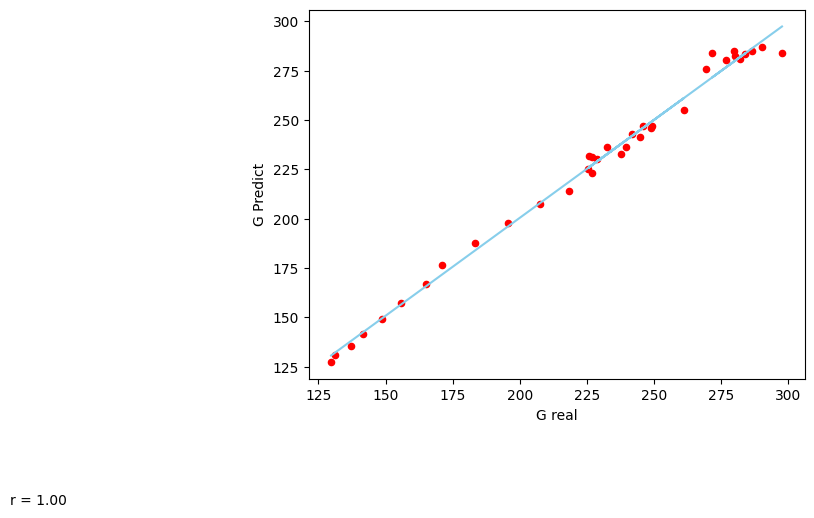

In [150]:
x = df['G']
y = df['model_predict']
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot()
plt.scatter(x,y, color="r", s=20)
plt.xlabel("G real")
plt.ylabel("G Predict")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
plt.show()

**1.b)** Comentar acerca de la significancia estadística de las variables, y reestimar si es necesario. 

Analizar correlación de las variables con respecto al indicador G

In [151]:
#matriz de correlación lineal entre las variables
corr_matrix = data.corr(method='pearson')


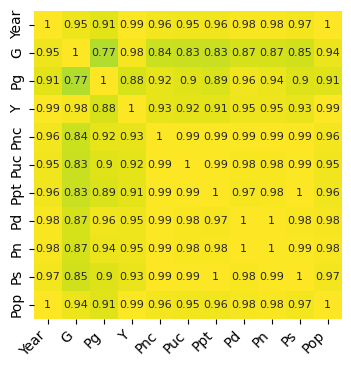

In [153]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

Probaremos eliminando las columnas que tienen menor correlación con el indicador G

In [156]:
df2 = data.drop(columns=['Pg','Puc','Ppt'])

In [158]:
# División de los datos en train y test
X = df2.drop(columns='G')
y = df2['G']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#agregar indicador G en los datos de entrenamiento para poder utilizar la función sfm.ols
datos_train = X_train.assign(G = y_train).copy()
modeloRM2 = sfm.ols(formula="G~Year+Y+Pnc+Pd+Pn+Ps+Pop", data=datos_train).fit() 
modeloRM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     337.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.45e-19
Time:                        20:04:17   Log-Likelihood:                -80.849
No. Observations:                  28   AIC:                             177.7
Df Residuals:                      20   BIC:                             188.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.478e+04   1.49e+04     -5.019      0.000   -1.06e+05   -4.37e+04
Year          39.3216      7.854      5.006      0.000      22.938      55.705
Y             -0.0015      0.010     -0.142      0.889      -0.023       0.020
Pnc           44.4063     35.590      1.248      0.227     -29.834     118.647
Pd          -198.2379     70.962     -2.794      0.011    -346.262     -50.214
Pn          -113.3755     56.675     -2.000      0.059    -231.598       4.847
Ps           -37.0150     38.500     -0.961      0.348    -117.326      43.296
Pop          -11.4162      2.495     -4.576      0.000     -16.620      -6.212
==============================================================================
Omnibus:                        2.640   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.400
Skew:                           0.010   Prob(JB):                        0.497
Kurtosis:                       4.095   Cond. No.                     1.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:

# Realizar predicciones usando el nuevo modelo
y_pred = modeloRM2.predict(X_test)

# Calcular el Mean Squared Error (MSE) y R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 28.18
R-squared (R2): 0.99


En base a los resultados de métricas de error, se concluye que al eliminar las columnas con menor correlación con el indicador G se logra obtener un mejor modelo.

**1.c)** Testear las hipótesis de que, al menos en lo que respecta a la demanda de gasolina, los consumidores
no diferencian entre los cambios en los precios de los autos nuevos y usados.


Como se logra ver en el mapa de calor, los indicadores de precios de autos nuevos y usados tienen baja correlación con el indicador de consumo de combustible (0.84 y 0.83 respectivamente). Lo cual nos permite plantear la hipótesis de que los consumidores no diferencian entre los cambios de los precios de autos nuevos y/o usados. Por lo tanto, se probará eliminando ambos indicadores para el entrenamiento del modelo. Como resultado se espera que el modelo obtenga un valor R2 cercano a 0.98, como inicialmente se calculó al considerar todas las variables. 

In [376]:
df23 = data.drop(columns=['Pnc','Puc'])

In [378]:
# División de los datos en train y test
X = df23.drop(columns='G')
y = df23['G']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#agregar indicador G en los datos de entrenamiento para poder utilizar la función sfm.ols
datos_train = X_train.assign(G = y_train).copy()
modeloRM3 = sfm.ols(formula="G~Year+Pg+Y+Ppt+Pd+Pn+Ps+Pop", data=datos_train).fit() 
modeloRM3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     373.7
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.14e-19
Time:                        14:34:51   Log-Likelihood:                -76.843
No. Observations:                  28   AIC:                             171.7
Df Residuals:                      19   BIC:                             183.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.549e+04      2e+04     -1.777      0.092   -7.73e+04    6316.984
Year          18.6059     10.536      1.766      0.093      -3.447      40.658
Pg           -25.1336     10.428     -2.410      0.026     -46.960      -3.307
Y              0.0084      0.011      0.785      0.442      -0.014       0.031
Ppt            6.1926     11.310      0.548      0.590     -17.479      29.864
Pd           -48.9375     54.957     -0.890      0.384    -163.965      66.090
Pn           167.9221    148.152      1.133      0.271    -142.165     478.009
Ps          -166.3909    105.055     -1.584      0.130    -386.273      53.491
Pop           -4.7994      3.378     -1.421      0.172     -11.871       2.272
==============================================================================
Omnibus:                        0.503   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.590
Skew:                           0.005   Prob(JB):                        0.744
Kurtosis:                       2.289   Cond. No.                     2.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [379]:

# Realizar predicciones usando el nuevo modelo
y_pred = modeloRM3.predict(X_test)

# Calcular el Mean Squared Error (MSE) y R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 37.53
R-squared (R2): 0.99


Conclusión: Finalmente la evaluación del modelo al eliminar los indicadores de precios de autos nuevos y usados resultó mejor, en términos de las métricas de error, que al considerar todas las variables. Aunque el valor esperado de R2 no es el mismo que se planteó en la hipótesis inicial, sí podemos corroborar que los consumidores de combustibles no diferencian entre los precios de autos nuevos y usados.

## **Problema 2: Clasificador ingenuo de Bayes**

Dado el siguiente dataset de pacientes:

data = [

  {"edad": 22, "fuma": 1, "IMC": 25, "diabetes": 0},

  {"edad": 45, "fuma": 0, "IMC": 29, "diabetes": 1},

  {"edad": 37, "fuma": 1, "IMC": 30, "diabetes": 1},

  {"edad": 19, "fuma": 0, "IMC": 22, "diabetes": 0},

  {"edad": 56, "fuma": 1, "IMC": 25,"diabetes": 1},

  {"edad": 33, "fuma": 0, "IMC": 31,"diabetes": 1},

  {"edad": 70, "fuma": 1, "IMC": 26,"diabetes": 0},

  {"edad": 47, "fuma": 1, "IMC": 28,"diabetes": 1},

  {"edad": 27, "fuma": 1, "IMC": 28,"diabetes": 0},

  {"edad": 43, "fuma": 0, "IMC": 31,"diabetes": 1},

  {"edad": 53, "fuma": 1, "IMC": 27,"diabetes": 1},

  {"edad": 62, "fuma": 1, "IMC": 24,"diabetes": 0}   
]

En donde IMC es el índice de masa corporal, y las variable "fuma" y "diabetes" son variables a valores discretos, donde 0 indica la ausencia de.

**2.a)** Implementa un clasificador Naive Bayes para predecir si un paciente tiene diabetes basándote en su edad, si fuma o no y su valor de IMC. 

**2.b)** Supón que un nuevo paciente de 28 años que fuma llega al consultorio. El personal paramédico le toma lo signos vitales y sale que pesa 81 kilos, mide 1.72 metros, tiene presión sistólica 130 mmHg y diastólica 90 mmHg. Usa tu modelo para predecir si este paciente tiene diabetes. Explica cómo llegó el modelo a esta predicción.

**2.c)**  Suponga que los investigadores de la UTFSM descubren un nuevo tipo de diabetes ("2"), pero aun no hemos observado ningún paciente con esa diabetes. ¿En qué sentido esto afectaría al modelo, de modo de poder predecir esa categoría?


In [164]:
lista_datos = [
  {"edad": 22, "fuma": 1, "IMC": 25, "diabetes": 0},

  {"edad": 45, "fuma": 0, "IMC": 29, "diabetes": 1},

  {"edad": 37, "fuma": 1, "IMC": 30, "diabetes": 1},

  {"edad": 19, "fuma": 0, "IMC": 22, "diabetes": 0},

  {"edad": 56, "fuma": 1, "IMC": 25,"diabetes": 1},

  {"edad": 33, "fuma": 0, "IMC": 31,"diabetes": 1},

  {"edad": 70, "fuma": 1, "IMC": 26,"diabetes": 0},

  {"edad": 47, "fuma": 1, "IMC": 28,"diabetes": 1},

  {"edad": 27, "fuma": 1, "IMC": 28,"diabetes": 0},

  {"edad": 43, "fuma": 0, "IMC": 31,"diabetes": 1},

  {"edad": 53, "fuma": 1, "IMC": 27,"diabetes": 1},

  {"edad": 62, "fuma": 1, "IMC": 24,"diabetes": 0}   
]
#Craer data frame
data2 = pd.DataFrame(lista_datos)

In [186]:
# Separar datos de entrenamiento y prueba

X = data2.drop(columns='diabetes')
y = data2['diabetes']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.70,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [187]:
# Escalar dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
# Clasificador Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [189]:
# Predicción
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 0]
 [0 0]
 [1 1]]


In [190]:
#Exactitud del modelo
accuracy_score(y_test, y_pred)

0.75

In [191]:
# Classification report
print(f'Reporte de clasificación: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



<Axes: >

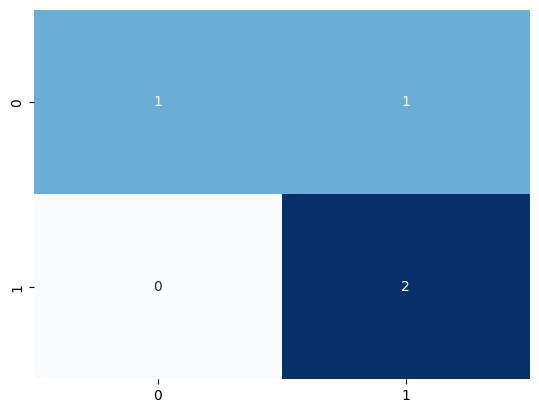

In [193]:
# matrix de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

Se ingresa nuevo paciente al modelo para probar su predicción en base a los datos entregados. Datos del paciente:
- Edad = 28 años 
- Fuma = sí 
- Masa = 81 kilos
- Estatura = 1.72 metros
- Presión sistólica = 130 mmHg 
- Presión diastólica = 90 mmHg.
- IMC = 47

Donde se ha calculado el IMC en base a su definición:

$$IMC = \frac{Masa}{Estatura}$$

Por otro lado, los datos de presión arterial se consideran altos (Ref: [Rangos de presión arterial](https://www.elsevier.es/es-revista-archivos-cardiologia-mexico-293-avance-fisiopatologia-hipertension-arterial-secundaria-obesidad-S1405994017300101)). Lo cual es un indicador más de padecer diabetes, debido a la relación entre la hipertensión y dicha enfermedad (Ref: [Diabetes e hipertensión](https://ve.scielo.org/scielo.php?script=sci_arttext&pid=S0798-02642000000100003))


In [201]:
datos_nuevoP = np.array([[28, 1,  47]])
pred_nuevoP = classifier.predict(datos_nuevoP)
print('Predicción del modelo:')
if pred_nuevoP == 1:
    print('Paciente con diabetes')
else:
    print('Paciente sin diabetes')     

Predicción del modelo:
Paciente con diabetes


Conclusión: Debido a la baja cantidad de datos el modelo presenta un porcentaje de exactitud relativamente bajo. Para solucionar esto, se plantea generar datos ficticios en base a los obtenidos, con el objetivo de mejorar la capacidad de clasificación del modelo.

**2.c)** Suponga que los investigadores de la UTFSM descubren un nuevo tipo de diabetes ("2"), pero aun no hemos observado ningún paciente con esa diabetes. ¿En qué sentido esto afectaría al modelo, de modo de poder predecir esa categoría?


Respuesta: A priori, no podríamos asegurar si el modelo desarrollado es capaz de detectar la enfermedad o no, ya que esta nueva categoria podría no tener una correlación directa con las variables utilizadas para el entrenamiento. 

## **Problema 3: Entendimiento de negocio, generación de datos y análisis de impacto**

La UTFSM tiene un sistema de acompañamiento a la trayectoria del estudiante que consiste en detectar los estudiantes con mayor riesgo de reprobación de asignaturas críticas y deserción estudiantil. En todas las medidas, existe una asignatura de nivelación denominada "Matemática 0" que es un asignatura voluntaria que nivela a estudiantes antes de entrar a asignaturas como cálculo diferencia y álgebra. Dados los altos niveles de reprobación y desercicón en determinadas carreras, se está evaluando hacer este ramo obligatorio para un determinado grupo de estudiantes.

**3.a)** Genere un dataframe artificial que sea ad-hoc al problema planteado. Cada fila debe ser un estudiante observado y las columnas deben ser las variables. Al menos debe existir la variable de identificación del estudiante y la carrera que cursa. Las carreras pueden ser ficticias o estar codificadas. También deben existir variables que den cuenta de la vulnerabilidad socioeconómica del estudiante, y por supuesto que de rendimiento y desempeño académico.

**3.b)** Proponga una metodología para evaluar si es cursar "Matemática 0" tiene un impacto positivo en el desempeño posterior del estuidante.

**3.c)** Realice el análisis usando al menos una prueba de hipótesis y al menos un método avanzado conocido en la literatura de análisis de impacto causal en el campo de la econometría. Fundamente sus elecciones en base a esta revisión de literatura. 

In [202]:
import random

En esta sección se producirán datos ficticios de estudiantes que han cursado los cursos: Cálculo diferencial, Álgebra y "Matematicas 0". Se busca simular un escenario donde se evidencie una baja probabilidad de aprobar los cursos de Álgebra y Cálculo sin haber obtenido nivelación "Matematicas 0". Por sobretodo, para aquellos estudiantes que ingresan con bajo puntaje en la prueba de admisión de educación superior.
Se asume rango de calificación de 1.0 a 7.0. Donde la nota mínima de aprobación es 5.0.

In [303]:
#Número de estudiantes del conjunto de datos a generar
n_estudiantes = 100  

#ID de estudiantes
ids = np.arange(1, n_estudiantes + 1)

#Carreras ficticias
carreras = [0, 1, 2, 3, 4]
carrera_estudiante = np.random.choice(carreras, n_estudiantes)

#Niveles socioeconómicos
niveles_socioeconomicos = ['bajo', 'medio', 'alto']
nivel_socioeconomico_estudiante = np.random.choice(niveles_socioeconomicos, n_estudiantes)

#Asignar si cursaron Matemática0
matematica0 = np.random.choice([0, 1], n_estudiantes)

#Puntajes PAES de ingreso
puntaje_PAES = []
for i in range(n_estudiantes):
    puntaje_PAES.append(random.randrange(550, 800, 10))


#Inicializar calificación final de cálculo diferencial y algebra
nota_calculo = np.zeros(n_estudiantes)
nota_algebra = np.zeros(n_estudiantes)


#Número de cursos previamente reprobados
reprobaciones_previas = np.random.randint(0, 3, n_estudiantes)

En la siguiente sección se estima la probabilidad de aprobación en los ramos de cálculo y álgebra según las condiciones iniciales de cada estudiante. Esto es, condición socioeconómica, puntaje PAES de ingreso, reprobaciones previas, y si cursó el ramo optativo "Matemáticas 0". 

Se define 75% de probabilidad para aprobar. Sin embargo, la calificación final aleatoria considera un mínimo proporcional a la probabilidad de aprobación.
Esto permite obtener algunos resultados "inesperados", es decir, estudiantes que reprueban a pesar de poseer las condiciones necesarias para aprobar. Lo cual se asemeja mucho más a la dinámica real de los estudiantes. Al mismo tiempo, sucede para aquellos con baja probabilidad de aprobación.

In [306]:
#Estima probabilidad de aprobación en cálculo y Álgebra
for i in range(n_estudiantes):
    #Ajustar la probabilidad de tener aprobar cálculo y álgebra dependiendo de:
    # -Si tomó Matemática0 
    # -Nivel socioeconómico
    # -Puntaje PAES de ingreso 
    # -Número de reprobaciones previas
    prob_aprobacion = 0.95 if matematica0[i] == 1 else 0.7  # Base para quienes tomaron Matemática0
    ajuste_socioeconomico = {'bajo': -0.07, 'medio': 0, 'alto': 0.07}
    prob_aprobacion += ajuste_socioeconomico[nivel_socioeconomico_estudiante[i]] #Ajuste de probabilidad según condición socioeconómica
    prob_aprobacion += ((puntaje_PAES[i]-600)/100)*0.2  #Ajuste de probabilidad según puntaje PAES de ingreso
    prob_aprobacion += (-reprobaciones_previas[i])*0.1 #Ajuste de probabilidad según rendimiento académico (cantidad de ramos reprobados previamente)
    
    #Definición de umbral de probabilidad de aprobación
    if prob_aprobacion > 0.75 :
        # Nota entre 51 y 100
        nota_calculo[i] = np.round(np.random.uniform(4.6 + prob_aprobacion, 7.0), 1)
        nota_algebra[i] = np.round(np.random.uniform(4.6 + prob_aprobacion, 7.0), 1)
    else:
        # Nota entre 1 y 50
        nota_calculo[i] = np.round(np.random.uniform(1.0 , 4.3 + prob_aprobacion), 1)
        nota_algebra[i] = np.round(np.random.uniform(1.0 , 4.3 + prob_aprobacion), 1)

# Crear el DataFrame
df3 = pd.DataFrame({
    'ID': ids,
    'Carrera': carrera_estudiante,
    'Nivel_Socioeconomico': nivel_socioeconomico_estudiante,
    'Reprobaciones_Previas': reprobaciones_previas,
    'Matematica0': matematica0,
    'Nota_Calculo': nota_calculo,
    'Nota_Algebra': nota_algebra,
    'Puntaje_PAES': puntaje_PAES
})

print(df3.head())  # Mostrar las primeras filas del dataframe

   ID  Carrera Nivel_Socioeconomico  Reprobaciones_Previas  Matematica0  \
0   1        0                medio                      0            0   
1   2        1                medio                      0            0   
2   3        2                 bajo                      2            0   
3   4        1                medio                      0            0   
4   5        2                 alto                      0            0   

   Nota_Calculo  Nota_Algebra  Puntaje_PAES  
0           4.3           3.4           590  
1           2.1           3.0           620  
2           3.7           4.0           590  
3           1.4           4.6           610  
4           1.4           2.6           560  


**3.b)** Proponga una metodología para evaluar si es cursar "Matemática 0" tiene un impacto positivo en el desempeño posterior del estuidante.

**3.c)** Realice el análisis usando al menos una prueba de hipótesis y al menos un método avanzado conocido en la literatura de análisis de impacto causal en el campo de la econometría. Fundamente sus elecciones en base a esta revisión de literatura. 


En base a los datos simulados se propone la siguiente metodología para determinar el impacto de cursar "Matemática 0":
- Generar nueva columna donde se especifique el promedio de notas de los ramos Cálculo y Álgebra
- Análisis de datos: Determinar porcentaje de alumnos con ramos aprobados (Álgebra y Cálculo) relacionando la variable: cursar "Matemáticas 0".
- Determinar correlación de ramos aprobados vs las demás variables. 
- Estimar impacto: calcular la diferencia entre la esperanza estadística de aprobación para alumnos que tomaron el curso de nivelación y la esperanza estadística de reprobación para quienes no tomaron el curso. (Ref: [Econometría](https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2448-66552019000200219))

In [315]:
#Promedio ramos
df32 = df3.copy()
df32['Promedio_ramos'] = df32[['Nota_Algebra','Nota_Calculo']].mean(axis=1)

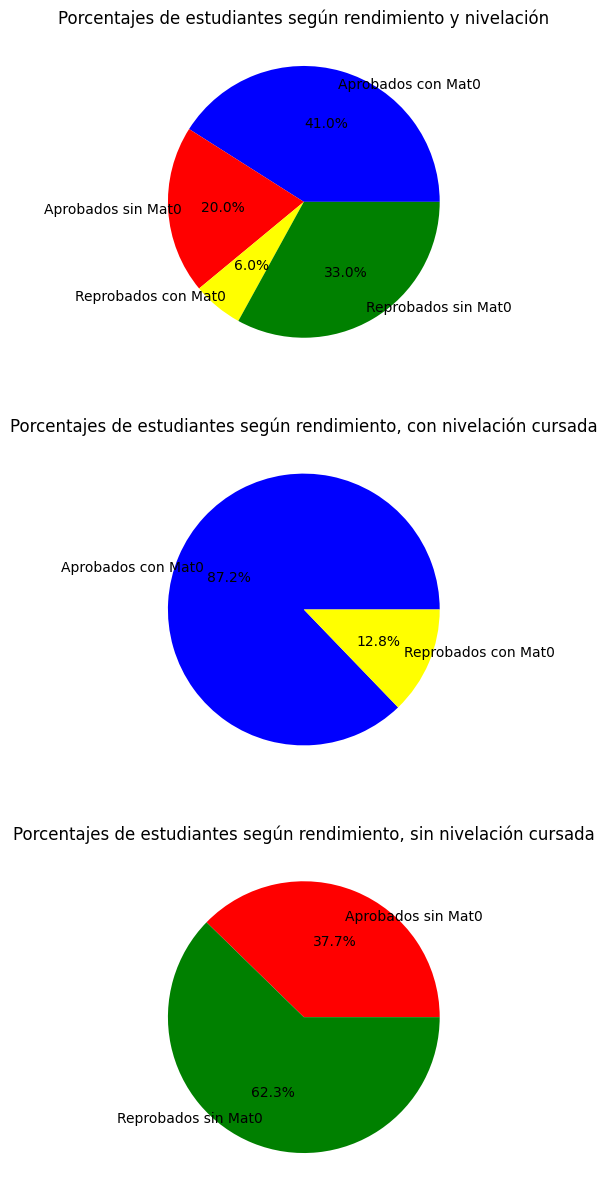

In [358]:
N_aprobados_con_Mat0 = df32['ID'][(df32['Promedio_ramos']>=5.0) & (df32['Matematica0']==1)].count()
N_aprobados_sin_Mat0 = df32['ID'][(df32['Promedio_ramos']>=5.0) & (df32['Matematica0']==0)].count()
N_reprobados_con_Mat0 = df32['ID'][(df32['Promedio_ramos']<5.0) & (df32['Matematica0']==1)].count()
N_reprobados_sin_Mat0 = df32['ID'][(df32['Promedio_ramos']<5.0) & (df32['Matematica0']==0)].count()

prct_aprobados_con_Mat0_total = round((N_aprobados_con_Mat0/df32['ID'].count())*100,1)
prct_aprobados_sin_Mat0_total = round((N_aprobados_sin_Mat0/df32['ID'].count())*100,1)
prct_reprobados_con_Mat0_total = round((N_reprobados_con_Mat0/df32['ID'].count())*100,1)
prct_reprobados_sin_Mat0_total = round((N_reprobados_sin_Mat0/df32['ID'].count())*100,1)

prct_aprobados_con_Mat0 = round((N_aprobados_con_Mat0/df32['ID'][(df32['Matematica0']==1)].count())*100,1)
prct_aprobados_sin_Mat0 = round((N_aprobados_sin_Mat0/df32['ID'][(df32['Matematica0']==0)].count())*100,1)
prct_reprobados_con_Mat0 = round((N_reprobados_con_Mat0/df32['ID'][(df32['Matematica0']==1)].count())*100,1)
prct_reprobados_sin_Mat0 = round((N_reprobados_sin_Mat0/df32['ID'][(df32['Matematica0']==0)].count())*100,1)

prct_total = np.array([prct_aprobados_con_Mat0_total,prct_aprobados_sin_Mat0_total,prct_reprobados_con_Mat0_total,prct_reprobados_sin_Mat0_total])
labels_total = ['Aprobados con Mat0', 'Aprobados sin Mat0', 'Reprobados con Mat0', 'Reprobados sin Mat0'] 

prct_con_Mat0 = np.array([prct_aprobados_con_Mat0,prct_reprobados_con_Mat0])
labels_con_Mat0 = ['Aprobados con Mat0',  'Reprobados con Mat0'] 


prct_sin_Mat0 = np.array([prct_aprobados_sin_Mat0,prct_reprobados_sin_Mat0])
labels_sin_Mat0 = ['Aprobados sin Mat0',  'Reprobados sin Mat0'] 

colors = ['blue','red','yellow','green']

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(6,15))

ax1.pie(prct_total, labels= labels_total, colors=colors, autopct='%1.1f%%', labeldistance=.9)
ax2.pie(prct_con_Mat0, labels=labels_con_Mat0, colors=[colors[0],colors[2]], autopct='%1.1f%%', labeldistance=.8)
ax3.pie(prct_sin_Mat0, labels=labels_sin_Mat0, colors=[colors[1],colors[3]], autopct='%1.1f%%', labeldistance=.8)
ax1.set_title('Porcentajes de estudiantes según rendimiento y nivelación')
ax2.set_title('Porcentajes de estudiantes según rendimiento, con nivelación cursada')
ax3.set_title('Porcentajes de estudiantes según rendimiento, sin nivelación cursada')

#ax1.legend()
#ax2.pie(N_reprobados_con_Mat0,N_reprobados_sin_Mat0)

plt.show()

De los gráficos se puede observar que el 33% de los estudiantes reprobados no rindieron el ramo optativo "Matematicas 0". Por otro lado, el 41% de los estudiantes que sí tomaron nivelación aprobaron, como también un 20% que no lo tomaron. Esto último, probablemente debido a poseer puntajes altos de PAES, pocos ramos reprobados con anterioridad y condición socioeconómica alta. 

Para responder a este último planteamiento, se procede a analizar la correlación de aprobación de ramos respecto a las demás variables.


In [361]:
#Nueva columna categórica "Rendimiento": Aprueba, Reprueba
df32['Rendimiento'] = np.where(df32['Promedio_ramos'] >=5.0, 1, 0)

In [366]:
#Codificar categoria de nivel socioeconómico
orden = ['bajo','medio','alto']
df32['Nivel_Socioeconomico'] = df32['Nivel_Socioeconomico'].map({cat: idx for idx, cat in enumerate(orden)})

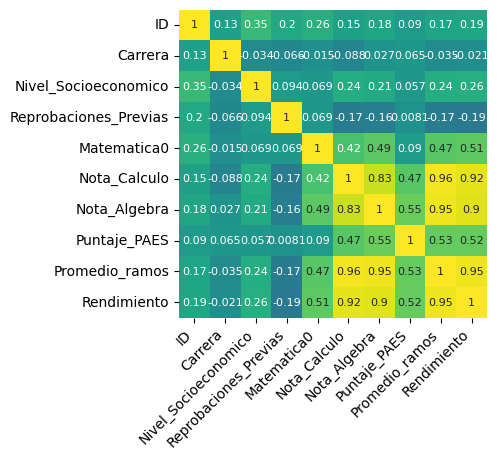

In [367]:
#matriz de correlación lineal entre las variables
corr_matrix2 = df32.corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix2,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

Del mapa de calor se puede observar que el rendimiento final de los ramos Cálculo y Álgebra está netamente correlacionado con el curso de nivelación "Matemáticas 0" y el puntaje PAES de ingreso. Además, con un porcentaje bajo aunque considerable, el nivel socioeconómico de los estudiantes influye en el rendimiento final con un valor de correlación de 0.26. 

Se plantea como hipótesis que las probabilidades de aprobar cursos matemáticos (en este caso Álgebra y Cálculo) de un estudiante en particular, dependen en gran medida de si ha tomado el curso de nivelación "Matematicas 0". Demostrando esta hipótesis, se podría evaluar la obligatoriedad de nivelación para estudiantes que cumplan ciertos requisitos (en este caso, bajo puntaje PAES de ingreso, y bajo nivel socioeconómico).

Para medir la evaluación de impacto se calculará la diferencia entre la esperanza estadística de aprobación para alumnos que tomaron el curso de nivelación y la esperanza estadística de reprobación para quienes no tomaron el curso. (Ref: [Econometría](https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2448-66552019000200219)). Por simplicidad, para la siguiente estimación se asume igualdad de condiciones a excepción del rendimiento del curso de nivelación.

In [373]:
#Valor esperado en promedio de ramos para estudiantes con "Matematicas 0" cursado
VE_con_Mate0 = np.mean(df32['Promedio_ramos'][df32['Matematica0']==1])

#Valor esperado en promedio de ramos para estudiantes sin "Matematicas 0" cursado
VE_sin_Mate0 = np.mean(df32['Promedio_ramos'][df32['Matematica0']==0])

impacto = VE_con_Mate0 - VE_sin_Mate0
print('Impacto: ', impacto)

Impacto:  1.6465074267362505


El valor positivo de impacto comprueba la hipotesis planteada. Por lo tanto, la rendición de "Matemáticas 0" debería ser obligatorio, con el fin de evitar eventuales deserciones. 